In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy.io import loadmat

# Load the .mat file
data = loadmat('/Users/Seven Healer/Desktop/EEG/EEG_128channels_resting_lanzhou_2015/02030021rest 20160105 1141..mat')

# Display all keys (variables) in the .mat file
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'a02030021rest_20160105_1141mat', 'samplingRate', 'Impedances_0'])


In [4]:
for key in data:
    print(f"{key}: {type(data[key])}")

__header__: <class 'bytes'>
__version__: <class 'str'>
__globals__: <class 'list'>
a02030021rest_20160105_1141mat: <class 'numpy.ndarray'>
samplingRate: <class 'numpy.ndarray'>
Impedances_0: <class 'numpy.ndarray'>


In [5]:
# Example: accessing a specific variable
eeg_data = data['a02030021rest_20160105_1141mat']
print(eeg_data)
print(eeg_data.shape)

[[ -822.37689209  -947.37982178  -856.62554932 ... -1417.53857422
  -1614.76623535 -1497.52490234]
 [-3106.14648438 -3296.26196289 -3215.91796875 ... -3914.37841797
  -4180.36132812 -4061.66821289]
 [-5813.68212891 -6065.76806641 -5937.43896484 ... -6318.55322266
  -6636.58886719 -6471.57324219]
 ...
 [-2288.21044922 -2482.51733398 -2387.23803711 ... -4875.11181641
  -5084.24267578 -4948.97070312]
 [-6171.88476562 -6414.50292969 -6308.9453125  ... -6767.15869141
  -7088.04345703 -6937.17431641]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]
(129, 75275)


In [6]:
baseline_data = eeg_data[-1, :]  # Assuming it's the last row

In [7]:
sampling_rate = data['samplingRate'][0][0]  # Adjust indexing if needed
print(f"Sampling Rate: {sampling_rate} Hz")

Sampling Rate: 250.0 Hz


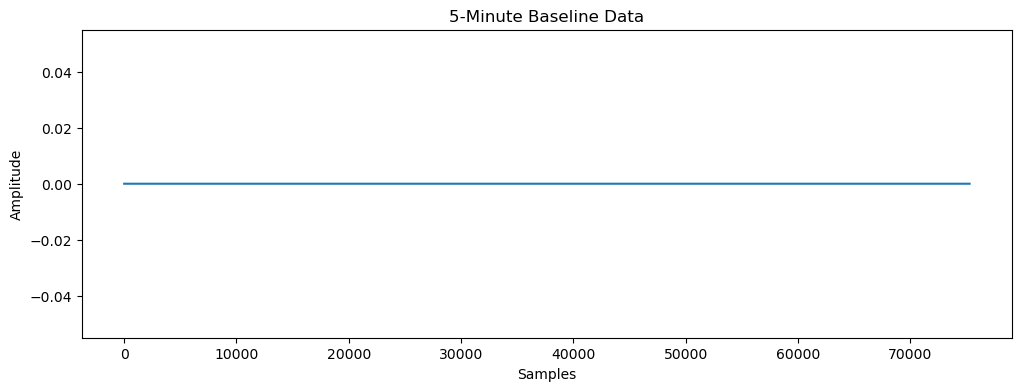

In [8]:
import matplotlib.pyplot as plt

# Plotting the 5-minute data
plt.figure(figsize=(12, 4))
plt.plot(baseline_data)  # Last row assumed to be the 5 min data
plt.title('5-Minute Baseline Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [9]:
eeg_data = eeg_data[:-1, :] #remove last row

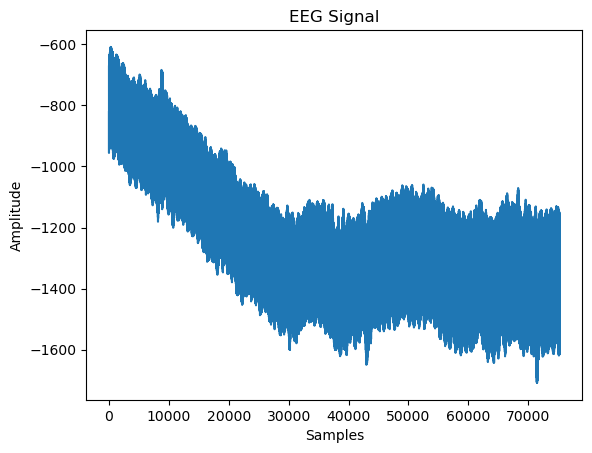

In [10]:
import matplotlib.pyplot as plt

plt.plot(eeg_data[0, :75275])  # Adjust indices based on your data
plt.title('EEG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [18]:
import numpy as np
# Min-Max Normalization
eeg_data_normalized = (eeg_data - np.min(eeg_data)) / (np.max(eeg_data) - np.min(eeg_data))

# print(eeg_data_normalized.shape)

# Z-Score Normalization
eeg_data_normalized_z_score = (eeg_data - np.mean(eeg_data)) / np.std(eeg_data)

print(eeg_data_normalized.shape)

(128, 75275)


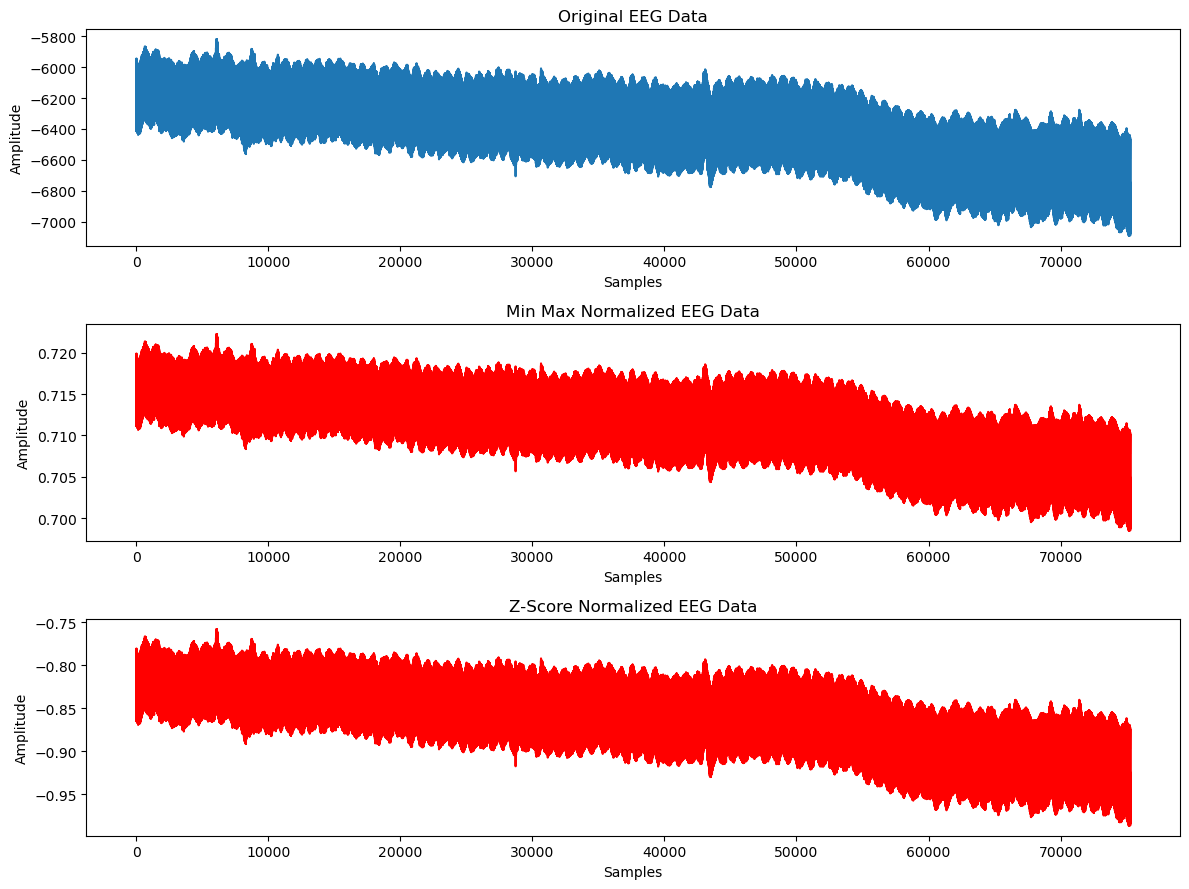

In [19]:
import matplotlib.pyplot as plt

# Plot original vs normalized data
plt.figure(figsize=(12, 9))

# Original Data
plt.subplot(3, 1, 1)
plt.plot(eeg_data[-1, :], label='Original Data')
plt.title('Original EEG Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Normalized Data
plt.subplot(3, 1, 2)
plt.plot(eeg_data_normalized[-1, :], label='Normalized Data', color='r')
plt.title('Min Max Normalized EEG Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Normalized Data
plt.subplot(3, 1, 3)
plt.plot(eeg_data_normalized_z_score[-1, :], label='Z-Score Normalized EEG Data', color='r')
plt.title('Z-Score Normalized EEG Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [20]:
from scipy.signal import butter, filtfilt

# Band-pass filter from 1 to 45 Hz
def bandpass_filter(data, low_cut, high_cut, fs, order=4):
    nyquist = 0.5 * fs
    low = low_cut / nyquist
    high = high_cut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data, axis=1)
    return y

# Settings
fs = 250  # Adjust based on your sampling rate
low_cut = 1   # Lower cutoff frequency (1 Hz)
high_cut = 45 # Upper cutoff frequency (45 Hz)

# Apply filter
eeg_data_filtered = bandpass_filter(eeg_data_normalized, low_cut, high_cut, fs)

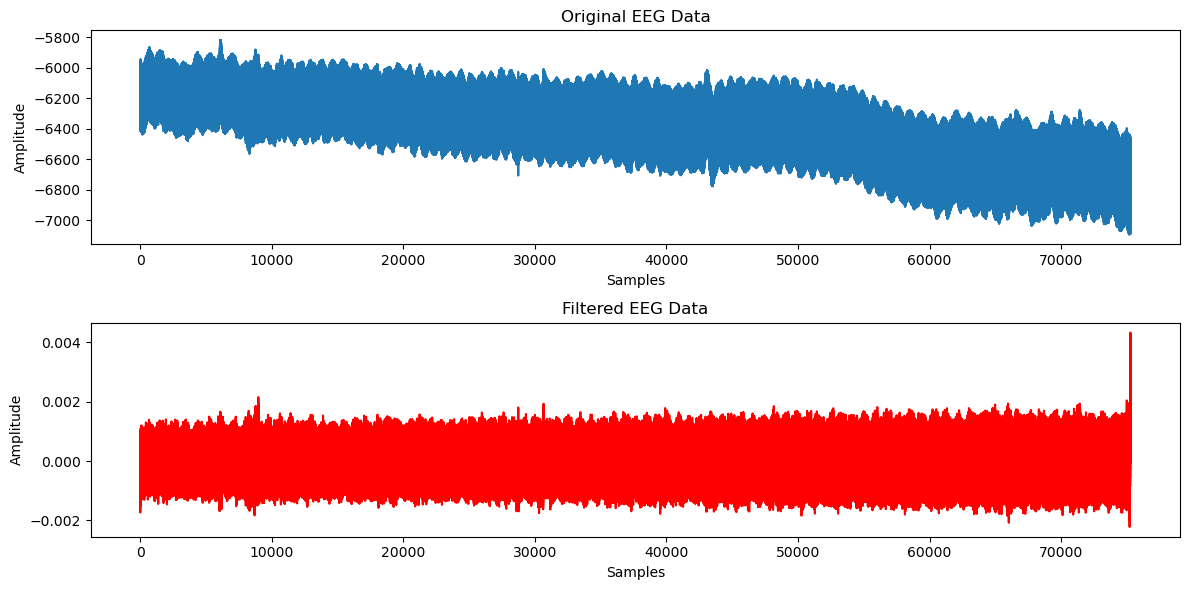

In [23]:
# Plot original vs filtered data
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(2, 1, 1)
plt.plot(eeg_data[-1, :], label='Original Data')
plt.title('Original EEG Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

# Filtered Data
plt.subplot(2, 1, 2)
plt.plot(eeg_data_filtered[-1, :], label='Filtered Data', color='r')
plt.title('Filtered EEG Data')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

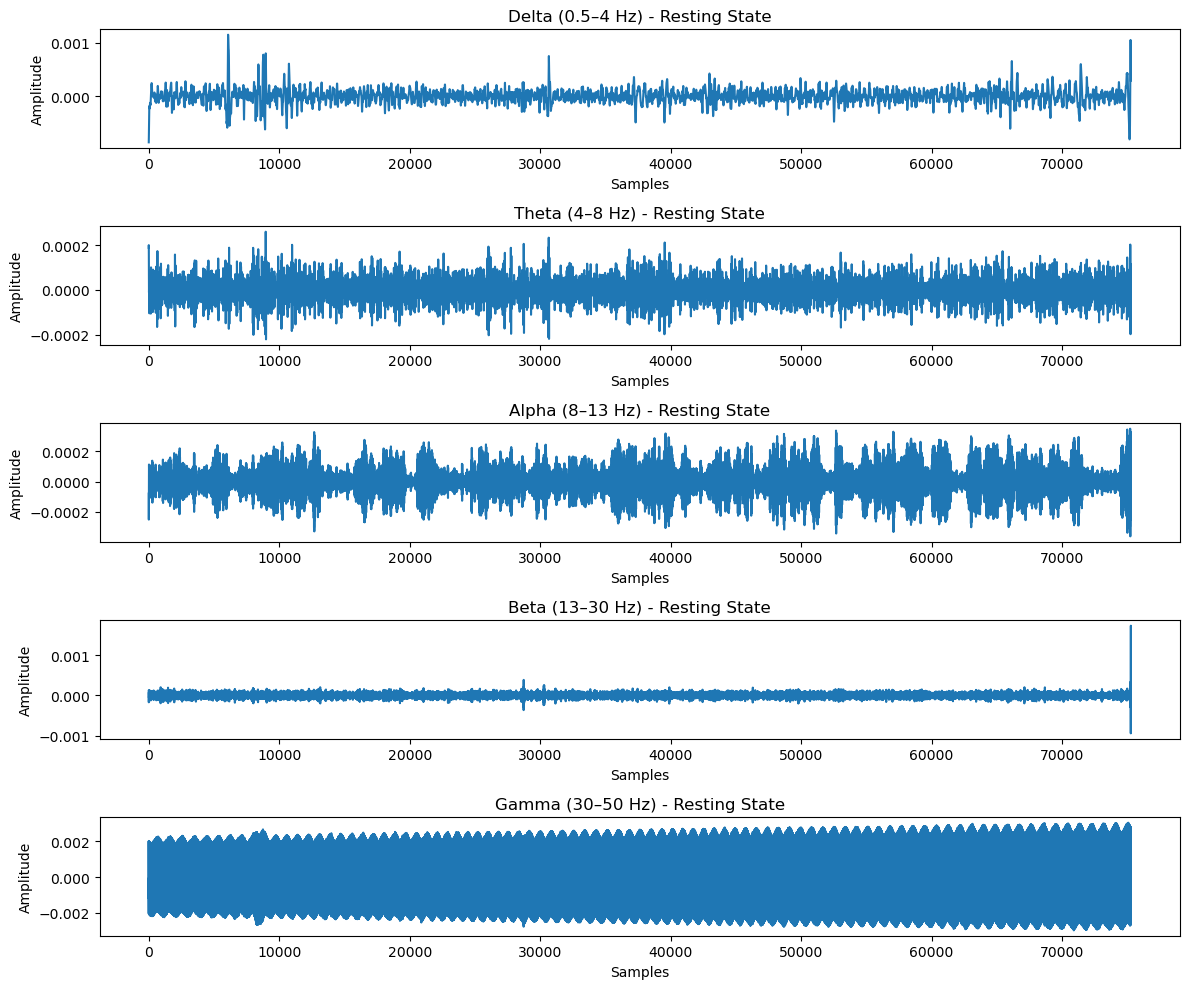

In [31]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Define the bandpass filter function
def bandpass_filter(data, low_cut, high_cut, fs, order=4):
    nyquist = 0.5 * fs
    low = low_cut / nyquist
    high = high_cut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data, axis=1)
    return y

# Sampling rate (adjust as needed)
fs = 250  # Hz

# Filter settings for different bands
bands = {
    'Delta (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13),
    'Beta (13–30 Hz)': (13, 30),
    'Gamma (30–50 Hz)': (30, 50)
}

# Apply bandpass filter to each band
filtered_data = {band: bandpass_filter(eeg_data_normalized, low, high, fs) 
                 for band, (low, high) in bands.items()}

# Plotting the filtered data
plt.figure(figsize=(12, 10))
for i, (band, data) in enumerate(filtered_data.items(), 1):
    plt.subplot(5, 1, i)
    plt.plot(data[-1, :], label=band)
    plt.title(f'{band} - Resting State')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


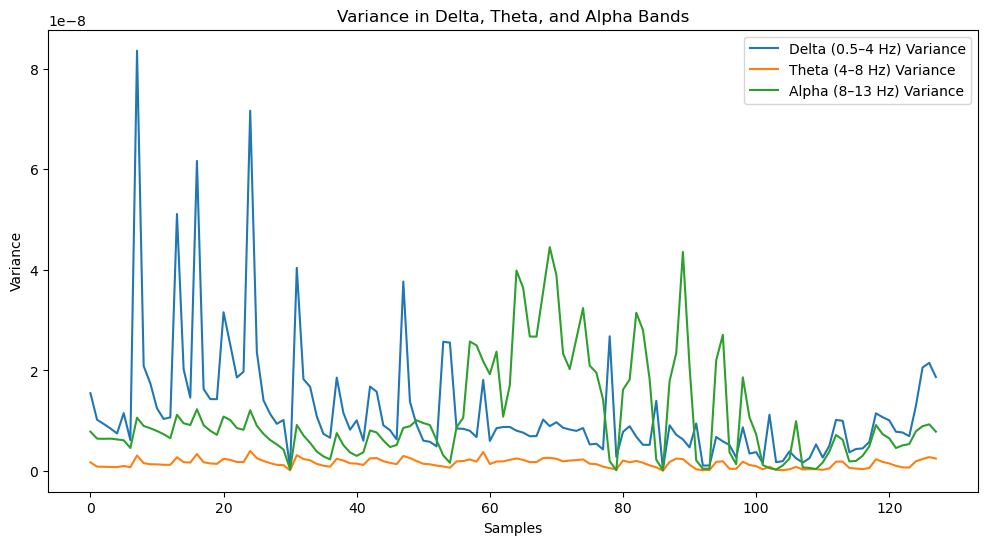

Band with the most significant changes: Delta (0.5–4 Hz)


In [32]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Define the bandpass filter function
def bandpass_filter(data, low_cut, high_cut, fs, order=4):
    nyquist = 0.5 * fs
    low = low_cut / nyquist
    high = high_cut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data, axis=1)
    return y

# Sampling rate (adjust as needed)
fs = 250  # Hz

# Filter settings for Delta, Theta, and Alpha bands
bands = {
    'Delta (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13)
}

# Apply bandpass filter to each band
filtered_data = {band: bandpass_filter(eeg_data_normalized, low, high, fs) 
                 for band, (low, high) in bands.items()}

# Calculate variance for each band
variances = {band: np.var(data, axis=1) for band, data in filtered_data.items()}

# Plotting the variance
plt.figure(figsize=(12, 6))
for band, var in variances.items():
    plt.plot(var, label=f'{band} Variance')

plt.title('Variance in Delta, Theta, and Alpha Bands')
plt.xlabel('Samples')
plt.ylabel('Variance')
plt.legend()
plt.show()

# Identify the band with the highest variance
max_variance_band = max(variances, key=lambda k: np.mean(variances[k]))
print(f"Band with the most significant changes: {max_variance_band}")


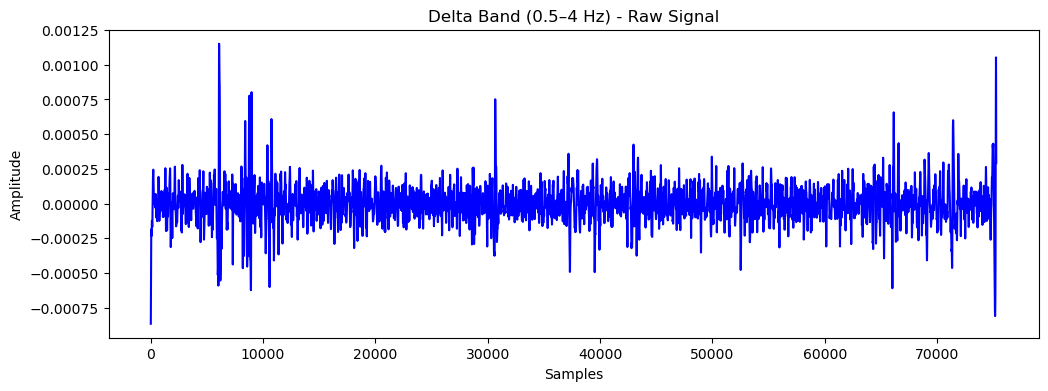

In [33]:
plt.figure(figsize=(12, 4))
plt.plot(filtered_data['Delta (0.5–4 Hz)'][-1, :], color='blue')
plt.title('Delta Band (0.5–4 Hz) - Raw Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

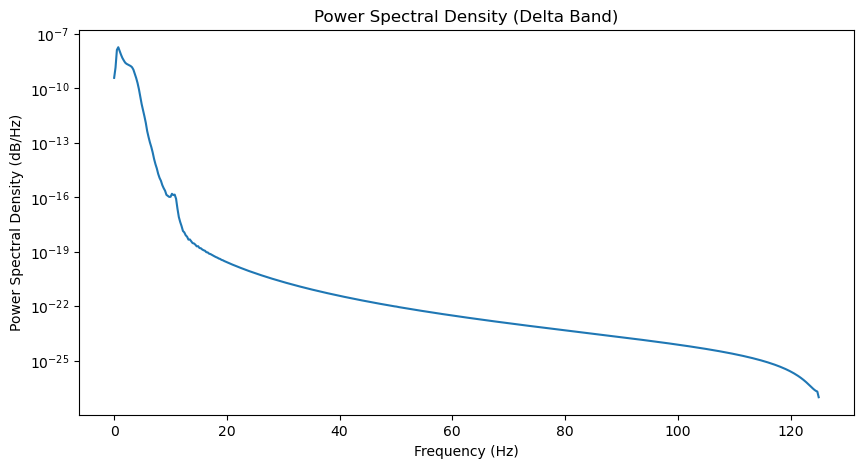

In [34]:
from scipy.signal import welch

# PSD for Delta band
f, Pxx = welch(filtered_data['Delta (0.5–4 Hz)'][-1, :], fs=fs, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.title('Power Spectral Density (Delta Band)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.show()

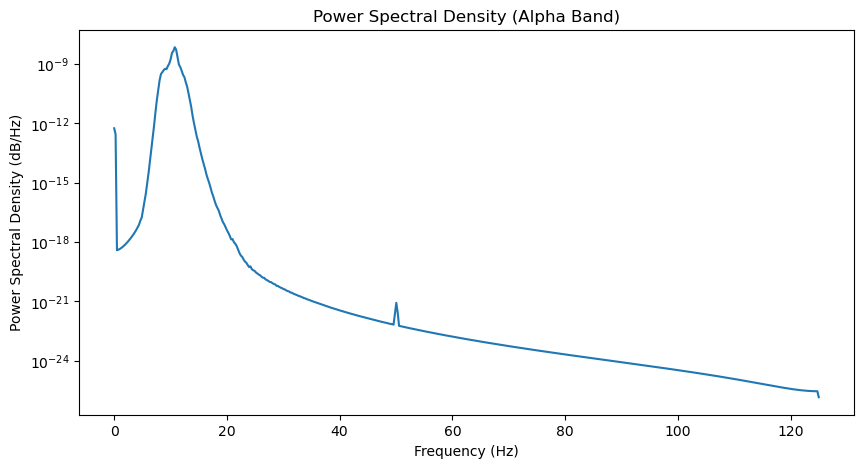

In [35]:
# For Alpha Band
f, Pxx = welch(filtered_data['Alpha (8–13 Hz)'][-1, :], fs=fs, nperseg=1024)

plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.title('Power Spectral Density (Alpha Band)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.show()

In [172]:
import numpy as np
import scipy.stats as stats
from scipy.signal import welch

def extract_time_domain_features(signal):
    """ Extract time-domain features from a 1D EEG signal. """
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = stats.skew(signal)
    kurt_val = stats.kurtosis(signal)
    rms_val = np.sqrt(np.mean(signal ** 2))
    
    # Zero Crossing Rate
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    zcr = len(zero_crossings) / len(signal)
    
    return {
        'Mean': mean_val,
        'Std': std_val,
        'Skewness': skew_val,
        'Kurtosis': kurt_val,
        'RMS': rms_val,
        'Zero Crossing Rate': zcr
    }

def extract_frequency_domain_features(signal, fs, band):
    """ Extract frequency-domain features using Power Spectral Density (PSD). """
    f, Pxx = welch(signal, fs=fs, nperseg=1024)
    
    # Mean frequency
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    
    # Spectral entropy
    Pxx_norm = Pxx / np.sum(Pxx)  # Normalize PSD
    spectral_entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm + np.finfo(float).eps))

    # Band Power Calculation
    band_indices = np.where((f >= band[0]) & (f <= band[1]))[0]
    band_power = np.sum(Pxx[band_indices])  # Sum the power in the selected frequency range
    
    return {
        'Mean Frequency': mean_freq,
        'Spectral Entropy': spectral_entropy,
        'Band Power': band_power
    }

# Example Usage
fs = 250  # Sampling frequency

# Define EEG bands (Delta, Theta, Alpha)
eeg_bands = {
    'Delta (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13)
}

features = {}

for band_name, band_range in eeg_bands.items():
    data = filtered_data[band_name]  # Make sure `filtered_data` has band-wise EEG signals
    time_features = extract_time_domain_features(data[-1, :])
    freq_features = extract_frequency_domain_features(data[-1, :], fs, band_range)
    
    features[band_name] = {**time_features, **freq_features}

# Print extracted features
for band, feat in features.items():
    print(f"Features for {band}:")
    for key, value in feat.items():
        print(f"  {key}: {value}")
    print("\n")


Features for Delta (0.5–4 Hz):
  Mean: -3.391216552961825e-07
  Std: 0.00013674849973377242
  Skewness: 0.443275860637642
  Kurtosis: 7.038002006804316
  RMS: 0.0001367489202258455
  Zero Crossing Rate: 0.012500830288940551
  Mean Frequency: 1.2296065485041832
  Spectral Entropy: 3.346226671539464
  Band Power: 5.787277686236037e-08


Features for Theta (4–8 Hz):
  Mean: 2.4244831158908756e-08
  Std: 4.993246998431018e-05
  Skewness: 0.007645922099332113
  Kurtosis: 0.6262025846979582
  RMS: 4.993247587037793e-05
  Zero Crossing Rate: 0.04662902690136168
  Mean Frequency: 5.701915819906279
  Spectral Entropy: 4.096477669583615
  Band Power: 9.826071597544699e-09


Features for Alpha (8–13 Hz):
  Mean: -1.241646727500609e-08
  Std: 8.853175663720466e-05
  Skewness: -0.00102116658817263
  Kurtosis: 0.43278355897746357
  RMS: 8.853175750790158e-05
  Zero Crossing Rate: 0.08446363334440385
  Mean Frequency: 10.568516270944047
  Spectral Entropy: 3.511114736285884
  Band Power: 3.1456559241

In [133]:
import os
import scipy.io as sio
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.signal import welch

# Feature Extraction Functions
def extract_time_domain_features(signal):
    """Extract time-domain features from a 1D EEG signal."""
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = stats.skew(signal)
    kurt_val = stats.kurtosis(signal)
    rms_val = np.sqrt(np.mean(signal ** 2))
    
    # Zero Crossing Rate
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    zcr = len(zero_crossings) / len(signal)
    
    return {
        'Mean': mean_val,
        'Std': std_val,
        'Skewness': skew_val,
        'Kurtosis': kurt_val,
        'RMS': rms_val,
        'Zero Crossing Rate': zcr
    }

def extract_frequency_domain_features(signal, fs, band):
    """Extract frequency-domain features using Power Spectral Density (PSD)."""
    f, Pxx = welch(signal, fs=fs, nperseg=1024)
    
    # Mean frequency
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    
    # Spectral entropy
    Pxx_norm = Pxx / np.sum(Pxx)  # Normalize PSD
    spectral_entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm + np.finfo(float).eps))

    # Band Power
    band_indices = np.where((f >= band[0]) & (f <= band[1]))
    band_power = np.sum(Pxx[band_indices])
    
    return {
        'Mean Frequency': mean_freq,
        'Spectral Entropy': spectral_entropy,
        'Band Power': band_power
    }

# Define EEG Bands
bands = {
    'Delta (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13)
}

# Load and Process EEG Data
def process_eeg_data(folder_path):
    fs = 250  # Sampling frequency
    all_features = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".mat"):
            # Check if file starts with 0201 or 0203 (strict condition)
            if filename.startswith("0201"):
                is_depressed = 1  # Depressed
            elif filename.startswith("0203"):
                is_depressed = 0  # Not Depressed
            else:
                continue  # Ignore files that do not start with 0201 or 0203
            
            file_path = os.path.join(folder_path, filename)
            patient_id = filename.split('.')[0]

            # Construct variable name inside .mat file
            mat_variable_name = f'a{patient_id.replace(" ", "_")}mat'

            # Load .mat file
            mat_data = sio.loadmat(file_path)
            
            if mat_variable_name in mat_data:
                eeg_data = mat_data[mat_variable_name]  # Shape: (128 channels, timepoints)
            else:
                print(f"Warning: Expected variable '{mat_variable_name}' not found in {filename}")
                continue
            
            # Process all 128 channels
            for channel in range(128):
                signal = eeg_data[channel, :]

                # Extract features for each frequency band
                for band_name, band_range in bands.items():
                    time_features = extract_time_domain_features(signal)
                    freq_features = extract_frequency_domain_features(signal, fs, band_range)

                    # Store all features along with metadata
                    feature_entry = {
                        'Patient_ID': patient_id,
                        'Channel': channel + 1,
                        'Band': band_name,
                        'Depressed': is_depressed
                    }
                    feature_entry.update(time_features)
                    feature_entry.update(freq_features)

                    all_features.append(feature_entry)

            # Print patient ID after successfully adding all data
            print(f"Processed Patient: {patient_id}")

    return all_features

# Example Usage
folder_path = "/Users/Seven Healer/Desktop/EEG/EEG_128channels_resting_lanzhou_2015"
features_data = process_eeg_data(folder_path)

# Convert to DataFrame & Save as CSV
df = pd.DataFrame(features_data)
df.to_csv("EEG_Features.csv", index=False)

print("Feature extraction complete. Data saved to EEG_Features.csv")

Processed Patient: 02010002rest 20150416 1017
Processed Patient: 02010004rest 20150427 1335
Processed Patient: 02010005rest 20150507 0907
Processed Patient: 02010006rest 20150528 0928
Processed Patient: 02010008_rest 20150619 1653
Processed Patient: 02010010rest 20150624 1447
Processed Patient: 02010011rest 20150625 1516
Processed Patient: 02010012rest 20150626 1026
Processed Patient: 02010013rest 20150703 1333
Processed Patient: 02010015rest 20150709 1456
Processed Patient: 02010016rest 20150710 1220
Processed Patient: 02010018rest 20150716 1237
Processed Patient: 02010019rest 20150716 1440
Processed Patient: 02010021 20150805 1730
Processed Patient: 02010022restnew 20150724 14
Processed Patient: 02010023rest 20150729 1929
Processed Patient: 02010024rest 20150814 1504
Processed Patient: 02010025 20160311 1206
Processed Patient: 02010026rest 20160311 1421
Processed Patient: 02010028rest 20160317 1538
Processed Patient: 02010030rest 20160324 1054
Processed Patient: 02010033rest 20160331

In [53]:
df = pd.read_csv("EEG_Features.csv")
df

Patient_ID  Channel              Band  Depressed  \
0      02010002rest 20150416 1017        1  Delta (0.5–4 Hz)          1   
1      02010002rest 20150416 1017        1    Theta (4–8 Hz)          1   
2      02010002rest 20150416 1017        1   Alpha (8–13 Hz)          1   
3      02010002rest 20150416 1017        2  Delta (0.5–4 Hz)          1   
4      02010002rest 20150416 1017        2    Theta (4–8 Hz)          1   
...                           ...      ...               ...        ...   
14203  02030021rest 20160105 1141      127    Theta (4–8 Hz)          0   
14204  02030021rest 20160105 1141      127   Alpha (8–13 Hz)          0   
14205  02030021rest 20160105 1141      128  Delta (0.5–4 Hz)          0   
14206  02030021rest 20160105 1141      128    Theta (4–8 Hz)          0   
14207  02030021rest 20160105 1141      128   Alpha (8–13 Hz)          0   

               Mean         Std  Skewness  Kurtosis           RMS  \
0      -4503.589425  408.227771 -0.056050 -0.714360   4522.053474   
1      -4503.589425  408.227771 -0.056050 -0.714360   4522.053474   
2      -4503.589425  408.227771 -0.056050 -0.714360   4522.053474   
3     -10390.621358  424.371843  0.068792 -0.803930  10399.283805   
4     -10390.621358  424.371843  0.068792 -0.803930  10399.283805   
...             ...         ...       ...       ...           ...   
14203  -3853.571461  906.819389  0.402745 -1.176565   3958.829929   
14204  -3853.571461  906.819389  0.402745 -1.176565   3958.829929   
14205  -6395.844257  257.392535 -0.322327 -0.558779   6401.021378   
14206  -6395.844257  257.392535 -0.322327 -0.558779   6401.021378   
14207  -6395.844257  257.392535 -0.322327 -0.558779   6401.021378   

       Zero Crossing Rate  Mean Frequency  Spectral Entropy  Band Power  
0                     0.0       49.448081          1.405132  446.907377  
1                     0.0       49.448081          1.405132   67.688435  
2                     0.0       49.448081          1.405132  148.355227  
3                     0.0       48.817160          1.493760  347.874374  
4                     0.0       48.817160          1.493760   56.453282  
...                   ...             ...               ...         ...  
14203                 0.0       49.419226          1.455937   35.518123  
14204                 0.0       49.419226          1.455937  110.928281  
14205                 0.0       49.876751          1.363271  195.768509  
14206                 0.0       49.876751          1.363271   31.806453  
14207                 0.0       49.876751          1.363271   93.025219  

[14208 rows x 13 columns]

In [187]:
import os
import scipy.io as sio
import numpy as np
import scipy.stats as stats
import pandas as pd
from scipy.signal import butter, filtfilt, welch

# Band-pass filter function
def bandpass_filter(data, low_cut, high_cut, fs, order=4):
    nyquist = 0.5 * fs
    low = low_cut / nyquist
    high = high_cut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data, axis=1)
    return y

# Feature extraction functions
def extract_time_domain_features(signal):
    mean_val = np.mean(signal)
    std_val = np.std(signal)
    skew_val = stats.skew(signal)
    kurt_val = stats.kurtosis(signal)
    rms_val = np.sqrt(np.mean(signal ** 2))
    
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    zcr = len(zero_crossings) / len(signal)
    
    return {
        'Mean': mean_val,
        'Std': std_val,
        'Skewness': skew_val,
        'Kurtosis': kurt_val,
        'RMS': rms_val,
        'Zero Crossing Rate': zcr
    }

def extract_frequency_domain_features(signal, fs, band):
    f, Pxx = welch(signal, fs=fs, nperseg=1024)
    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)
    
    Pxx_norm = Pxx / np.sum(Pxx)
    spectral_entropy = -np.sum(Pxx_norm * np.log2(Pxx_norm + np.finfo(float).eps))
    
    band_indices = np.where((f >= band[0]) & (f <= band[1]))
    band_power = np.sum(Pxx[band_indices])
    
    return {
        'Mean Frequency': mean_freq,
        'Spectral Entropy': spectral_entropy,
        'Band Power': band_power
    }

# EEG bands
bands = {
    'Delta (0.5–4 Hz)': (0.5, 4),
    'Theta (4–8 Hz)': (4, 8),
    'Alpha (8–13 Hz)': (8, 13)
}

def process_eeg_data(folder_path):
    fs = 250  # Sampling frequency
    all_features = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".mat"):
            if filename.startswith("0201"):
                is_depressed = 1  # Depressed
            elif filename.startswith("0203"):
                is_depressed = 0  # Not Depressed
            else:
                continue
            
            file_path = os.path.join(folder_path, filename)
            patient_id = filename.split('.')[0]
            mat_variable_name = f'a{patient_id.replace(" ", "_")}mat'
            mat_data = sio.loadmat(file_path)
            
            if mat_variable_name in mat_data:
                eeg_data = mat_data[mat_variable_name]
            else:
                print(f"Warning: {mat_variable_name} not found in {filename}")
                continue
            
            eeg_data = eeg_data[:-1, :]  # Remove last row
            eeg_data_filtered = bandpass_filter(eeg_data, 1, 45, fs)  # Apply band-pass filter
            # eeg_data_normalized = (eeg_data_filtered - np.min(eeg_data_filtered)) / (np.max(eeg_data_filtered) - np.min(eeg_data_filtered))  # Normalize
            
            for channel in range(128):
                signal = eeg_data_filtered[channel, :]
                for band_name, band_range in bands.items():
                    time_features = extract_time_domain_features(signal)
                    freq_features = extract_frequency_domain_features(signal, fs, band_range)
                    feature_entry = {
                        'Patient_ID': patient_id,
                        'Channel': channel + 1,
                        'Band': band_name,
                        'Depressed': is_depressed
                    }
                    feature_entry.update(time_features)
                    feature_entry.update(freq_features)
                    all_features.append(feature_entry)
            
            print(f"Processed Patient: {patient_id}")
    
    return all_features

# Process and save features
folder_path = "/Users/Seven Healer/Desktop/EEG/EEG_128channels_resting_lanzhou_2015"
features_data = process_eeg_data(folder_path)
df = pd.DataFrame(features_data)
df.to_csv("EEG_Features.csv", index=False)
print("Feature extraction complete. Data saved to EEG_Features.csv")

Processed Patient: 02010002rest 20150416 1017
Processed Patient: 02010004rest 20150427 1335
Processed Patient: 02010005rest 20150507 0907
Processed Patient: 02010006rest 20150528 0928
Processed Patient: 02010008_rest 20150619 1653
Processed Patient: 02010010rest 20150624 1447
Processed Patient: 02010011rest 20150625 1516
Processed Patient: 02010012rest 20150626 1026
Processed Patient: 02010013rest 20150703 1333
Processed Patient: 02010015rest 20150709 1456
Processed Patient: 02010016rest 20150710 1220
Processed Patient: 02010018rest 20150716 1237
Processed Patient: 02010019rest 20150716 1440
Processed Patient: 02010021 20150805 1730
Processed Patient: 02010022restnew 20150724 14
Processed Patient: 02010023rest 20150729 1929
Processed Patient: 02010024rest 20150814 1504
Processed Patient: 02010025 20160311 1206
Processed Patient: 02010026rest 20160311 1421
Processed Patient: 02010028rest 20160317 1538
Processed Patient: 02010030rest 20160324 1054
Processed Patient: 02010033rest 20160331

In [188]:
df1 = pd.read_csv('EEG_Features.csv')
df1

Patient_ID  Channel              Band  Depressed  \
0      02010002rest 20150416 1017        1  Delta (0.5–4 Hz)          1   
1      02010002rest 20150416 1017        1    Theta (4–8 Hz)          1   
2      02010002rest 20150416 1017        1   Alpha (8–13 Hz)          1   
3      02010002rest 20150416 1017        2  Delta (0.5–4 Hz)          1   
4      02010002rest 20150416 1017        2    Theta (4–8 Hz)          1   
...                           ...      ...               ...        ...   
14203  02030021rest 20160105 1141      127    Theta (4–8 Hz)          0   
14204  02030021rest 20160105 1141      127   Alpha (8–13 Hz)          0   
14205  02030021rest 20160105 1141      128  Delta (0.5–4 Hz)          0   
14206  02030021rest 20160105 1141      128    Theta (4–8 Hz)          0   
14207  02030021rest 20160105 1141      128   Alpha (8–13 Hz)          0   

           Mean        Std  Skewness  Kurtosis        RMS  Zero Crossing Rate  \
0     -0.183399  80.092918 -0.033275 -1.268535  80.093128            0.399979   
1     -0.183399  80.092918 -0.033275 -1.268535  80.093128            0.399979   
2     -0.183399  80.092918 -0.033275 -1.268535  80.093128            0.399979   
3     -0.071447  47.534509 -0.007931 -1.336281  47.534563            0.400165   
4     -0.071447  47.534509 -0.007931 -1.336281  47.534563            0.400165   
...         ...        ...       ...       ...        ...                 ...   
14203  0.013907  36.593832  0.002361 -1.311383  36.593835            0.399973   
14204  0.013907  36.593832  0.002361 -1.311383  36.593835            0.399973   
14205  0.019617  48.520520  0.004895 -1.359104  48.520524            0.400372   
14206  0.019617  48.520520  0.004895 -1.359104  48.520524            0.400372   
14207  0.019617  48.520520  0.004895 -1.359104  48.520524            0.400372   

       Mean Frequency  Spectral Entropy  Band Power  
0           49.364226          1.459775  145.004559  
1           49.364226          1.459775   67.687556  
2           49.364226          1.459775  148.354986  
3           48.354628          1.707574  125.269440  
4           48.354628          1.707574   56.451526  
...               ...               ...         ...  
14203       47.826986          1.810201   35.517789  
14204       47.826986          1.810201  110.928242  
14205       49.003559          1.547217   86.125066  
14206       49.003559          1.547217   31.806328  
14207       49.003559          1.547217   93.025205  

[14208 rows x 13 columns]

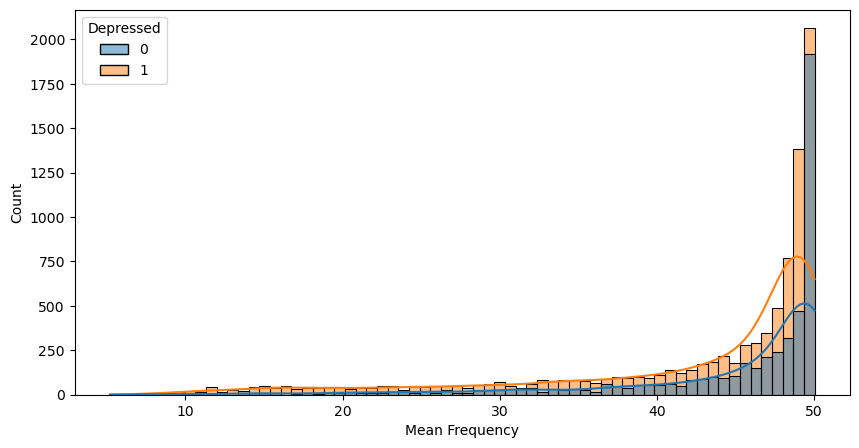

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df1, x="Mean Frequency", hue="Depressed", kde=True)
plt.show()

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Band'] = le.fit_transform(df1['Band'])
df1

Patient_ID  Channel  Band  Depressed      Mean  \
0      02010002rest 20150416 1017        1     1          1 -0.183399   
1      02010002rest 20150416 1017        1     2          1 -0.183399   
2      02010002rest 20150416 1017        1     0          1 -0.183399   
3      02010002rest 20150416 1017        2     1          1 -0.071447   
4      02010002rest 20150416 1017        2     2          1 -0.071447   
...                           ...      ...   ...        ...       ...   
14203  02030021rest 20160105 1141      127     2          0  0.013907   
14204  02030021rest 20160105 1141      127     0          0  0.013907   
14205  02030021rest 20160105 1141      128     1          0  0.019617   
14206  02030021rest 20160105 1141      128     2          0  0.019617   
14207  02030021rest 20160105 1141      128     0          0  0.019617   

             Std  Skewness  Kurtosis        RMS  Zero Crossing Rate  \
0      80.092918 -0.033275 -1.268535  80.093128            0.399979   
1      80.092918 -0.033275 -1.268535  80.093128            0.399979   
2      80.092918 -0.033275 -1.268535  80.093128            0.399979   
3      47.534509 -0.007931 -1.336281  47.534563            0.400165   
4      47.534509 -0.007931 -1.336281  47.534563            0.400165   
...          ...       ...       ...        ...                 ...   
14203  36.593832  0.002361 -1.311383  36.593835            0.399973   
14204  36.593832  0.002361 -1.311383  36.593835            0.399973   
14205  48.520520  0.004895 -1.359104  48.520524            0.400372   
14206  48.520520  0.004895 -1.359104  48.520524            0.400372   
14207  48.520520  0.004895 -1.359104  48.520524            0.400372   

       Mean Frequency  Spectral Entropy  Band Power  
0           49.364226          1.459775  145.004559  
1           49.364226          1.459775   67.687556  
2           49.364226          1.459775  148.354986  
3           48.354628          1.707574  125.269440  
4           48.354628          1.707574   56.451526  
...               ...               ...         ...  
14203       47.826986          1.810201   35.517789  
14204       47.826986          1.810201  110.928242  
14205       49.003559          1.547217   86.125066  
14206       49.003559          1.547217   31.806328  
14207       49.003559          1.547217   93.025205  

[14208 rows x 13 columns]

In [191]:
df1["Depressed"].value_counts()

Depressed
1    9216
0    4992
Name: count, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Patient_ID','Depressed'],axis=1)  # Features
y = df1["Depressed"] # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X[X["Zero Crossing Rate"] == 0])

0

In [194]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Use transform(), NOT fit_transform()

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9827586206896551


In [196]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1022
           1       0.98      1.00      0.99      1820

    accuracy                           0.98      2842
   macro avg       0.99      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

0.9775289778714437


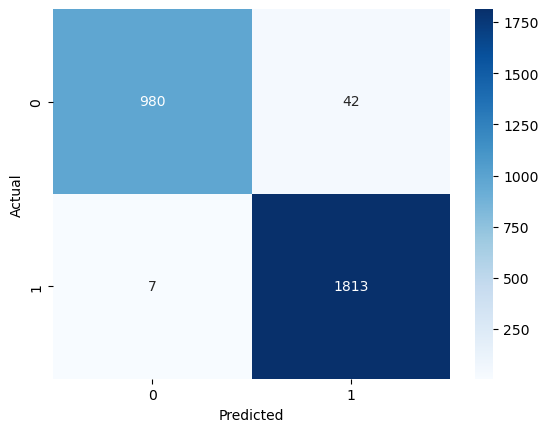

In [197]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<Axes: >

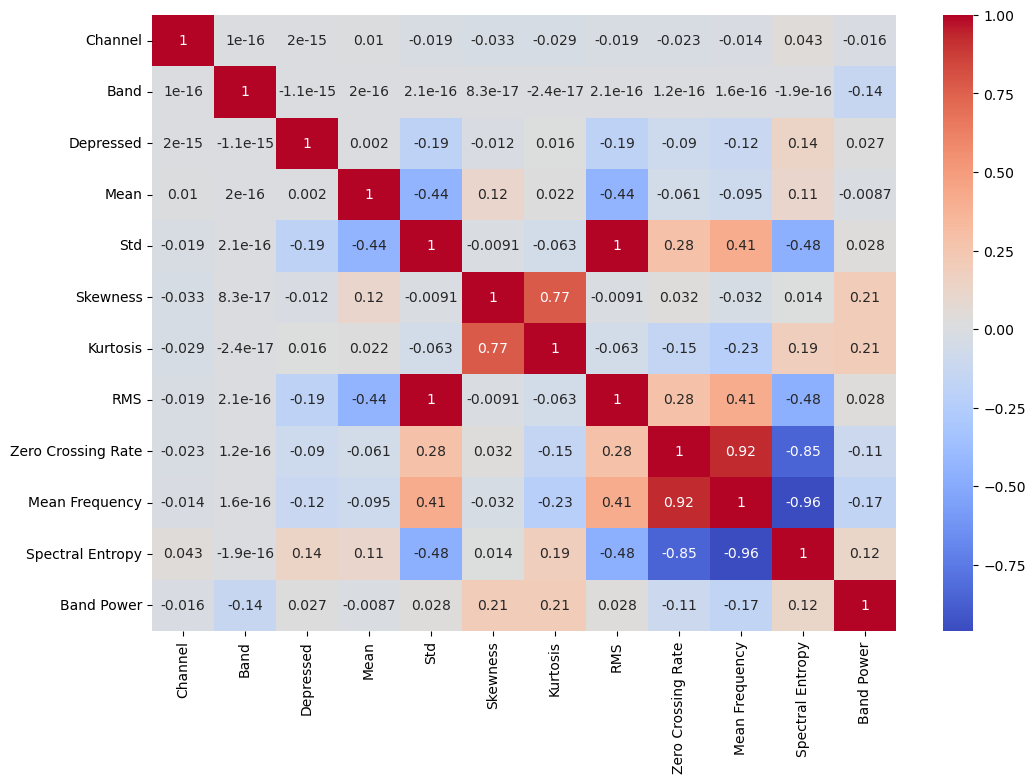

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df1.drop('Patient_ID',axis=1)
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [199]:
df2

Channel  Band  Depressed      Mean        Std  Skewness  Kurtosis  \
0            1     1          1 -0.183399  80.092918 -0.033275 -1.268535   
1            1     2          1 -0.183399  80.092918 -0.033275 -1.268535   
2            1     0          1 -0.183399  80.092918 -0.033275 -1.268535   
3            2     1          1 -0.071447  47.534509 -0.007931 -1.336281   
4            2     2          1 -0.071447  47.534509 -0.007931 -1.336281   
...        ...   ...        ...       ...        ...       ...       ...   
14203      127     2          0  0.013907  36.593832  0.002361 -1.311383   
14204      127     0          0  0.013907  36.593832  0.002361 -1.311383   
14205      128     1          0  0.019617  48.520520  0.004895 -1.359104   
14206      128     2          0  0.019617  48.520520  0.004895 -1.359104   
14207      128     0          0  0.019617  48.520520  0.004895 -1.359104   

             RMS  Zero Crossing Rate  Mean Frequency  Spectral Entropy  \
0      80.093128            0.399979       49.364226          1.459775   
1      80.093128            0.399979       49.364226          1.459775   
2      80.093128            0.399979       49.364226          1.459775   
3      47.534563            0.400165       48.354628          1.707574   
4      47.534563            0.400165       48.354628          1.707574   
...          ...                 ...             ...               ...   
14203  36.593835            0.399973       47.826986          1.810201   
14204  36.593835            0.399973       47.826986          1.810201   
14205  48.520524            0.400372       49.003559          1.547217   
14206  48.520524            0.400372       49.003559          1.547217   
14207  48.520524            0.400372       49.003559          1.547217   

       Band Power  
0      145.004559  
1       67.687556  
2      148.354986  
3      125.269440  
4       56.451526  
...           ...  
14203   35.517789  
14204  110.928242  
14205   86.125066  
14206   31.806328  
14207   93.025205  

[14208 rows x 12 columns]

In [102]:
X_train.shape, df2.shape

((9945, 11), (14208, 12))

               Feature  Importance
7   Zero Crossing Rate    0.187336
2                 Mean    0.126582
9     Spectral Entropy    0.109680
5             Kurtosis    0.105736
4             Skewness    0.104499
8       Mean Frequency    0.096628
3                  Std    0.083635
6                  RMS    0.081118
0              Channel    0.058666
10          Band Power    0.042001
1                 Band    0.004118


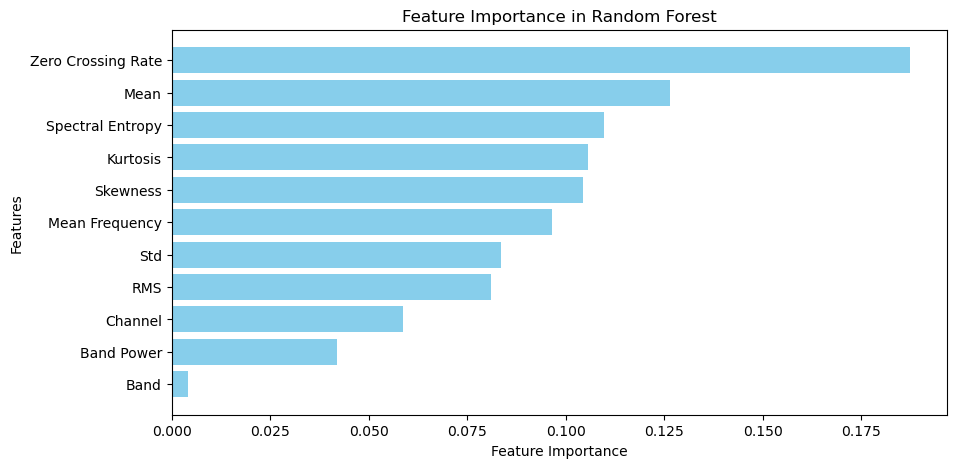

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': df2.drop('Depressed',axis=1).columns, 'Importance': importance})

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print importance values
print(feature_importance_df)

# Plot the importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Flip the order
plt.show()

In [202]:
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
import numpy as np

# Train your SVC model
svc = SVC(kernel='rbf')  # Or any kernel
svc.fit(X_train, y_train)

# Compute feature importance
perm_importance = permutation_importance(svc, X_test, y_test, scoring='accuracy')

# Extract feature names and importance values
feature_names = df2.drop('Depressed', axis=1).columns
importance_values = perm_importance.importances_mean

# Ensure both have the same length
print(len(feature_names), len(importance_values))  # Debugging step

# Convert to DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance_values
})

# Sort and print
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)
print(perm_importance_df)

11 11
               Feature  Importance
8       Mean Frequency    0.057284
9     Spectral Entropy    0.053132
7   Zero Crossing Rate    0.036453
3                  Std    0.026390
6                  RMS    0.026390
2                 Mean    0.014215
5             Kurtosis    0.003096
10          Band Power    0.002745
0              Channel    0.001267
4             Skewness    0.001056
1                 Band   -0.000633


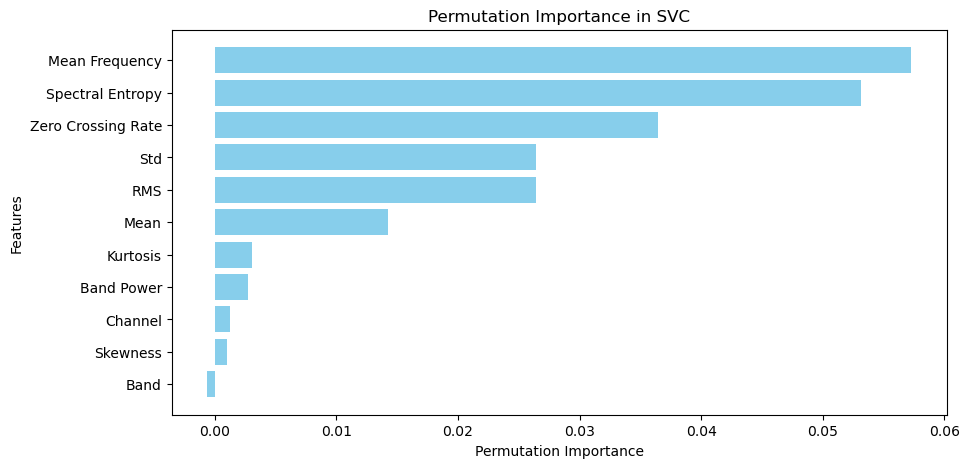

In [203]:
# Plot the importance
plt.figure(figsize=(10, 5))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='skyblue')
plt.xlabel("Permutation Importance")
plt.ylabel("Features")
plt.title("Permutation Importance in SVC")
plt.gca().invert_yaxis()  # Flip the order
plt.show()

In [204]:
y_pred2 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(roc_auc_score(y_test,y_pred2))

0.6938775510204082
0.5795122685533645


In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm  # Import tqdm for progress tracking

# Define models and hyperparameter grids
models = {
    "LogisticRegression": (LogisticRegression(solver='liblinear'), {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    }),
    "DecisionTree": (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5, 10, 20],
        'min_samples_split': [5]  # Regularization
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    "CatBoost": (CatBoostClassifier(verbose=0), {
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.1],
        'iterations': [100, 200]
    }),
    "LightGBM": (LGBMClassifier(), {
        'num_leaves': [20, 31, 40],  # Regularization
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200]
    }),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'max_depth': [3, 6, 10],
        'gamma': [1],  # Regularization
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200]
    })
}

# Run GridSearchCV for each model with tqdm progress tracking
for model_name, (model, param_grid) in tqdm(models.items(), desc="Model Tuning Progress"):
    print(f"\n🔍 Running GridSearchCV for {model_name}...\n")
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"✅ Best Parameters for {model_name}: {grid_search.best_params_}")
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 {model_name} Accuracy: {acc:.4f}")
    
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    print("-" * 50)

Model Tuning Progress:   0%|          | 0/6 [00:00<?, ?it/s]


🔍 Running GridSearchCV for LogisticRegression...

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Model Tuning Progress:  17%|█▋        | 1/6 [00:02<00:12,  2.51s/it]

✅ Best Parameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
📊 LogisticRegression Accuracy: 0.6890

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.17      0.28      1022
           1       0.68      0.98      0.80      1820

    accuracy                           0.69      2842
   macro avg       0.75      0.58      0.54      2842
weighted avg       0.73      0.69      0.61      2842

--------------------------------------------------

🔍 Running GridSearchCV for DecisionTree...

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Model Tuning Progress:  33%|███▎      | 2/6 [00:02<00:05,  1.32s/it]

✅ Best Parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
📊 DecisionTree Accuracy: 0.9669

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1022
           1       0.97      0.98      0.97      1820

    accuracy                           0.97      2842
   macro avg       0.97      0.96      0.96      2842
weighted avg       0.97      0.97      0.97      2842

--------------------------------------------------

🔍 Running GridSearchCV for KNN...

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Model Tuning Progress:  50%|█████     | 3/6 [00:03<00:03,  1.08s/it]

✅ Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
📊 KNN Accuracy: 0.7590

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.53      0.61      1022
           1       0.77      0.89      0.82      1820

    accuracy                           0.76      2842
   macro avg       0.75      0.71      0.72      2842
weighted avg       0.75      0.76      0.75      2842

--------------------------------------------------

🔍 Running GridSearchCV for CatBoost...

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Model Tuning Progress:  67%|██████▋   | 4/6 [01:17<00:59, 29.63s/it]

✅ Best Parameters for CatBoost: {'depth': 10, 'iterations': 200, 'learning_rate': 0.1}
📊 CatBoost Accuracy: 0.9845

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1022
           1       0.98      1.00      0.99      1820

    accuracy                           0.98      2842
   macro avg       0.99      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

--------------------------------------------------

🔍 Running GridSearchCV for LightGBM...

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 7396, number of negative: 3970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 11366, number of used features: 11
[LightGBM] [Info] [bin

Model Tuning Progress:  83%|████████▎ | 5/6 [01:24<00:21, 21.49s/it]

✅ Best Parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 40}
📊 LightGBM Accuracy: 0.9775

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1022
           1       0.97      0.99      0.98      1820

    accuracy                           0.98      2842
   macro avg       0.98      0.97      0.98      2842
weighted avg       0.98      0.98      0.98      2842

--------------------------------------------------

🔍 Running GridSearchCV for XGBoost...

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Seven Healer\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Model Tuning Progress: 100%|██████████| 6/6 [01:29<00:00, 14.84s/it]

✅ Best Parameters for XGBoost: {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
📊 XGBoost Accuracy: 0.9370

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1022
           1       0.92      0.98      0.95      1820

    accuracy                           0.94      2842
   macro avg       0.94      0.92      0.93      2842
weighted avg       0.94      0.94      0.94      2842

--------------------------------------------------


In [206]:
cb_model = CatBoostClassifier(verbose=0, depth= 10, iterations= 200, learning_rate= 0.1)
cb_model.fit(X_train,y_train)

In [207]:
cb_y_pred = cb_model.predict(X_test)
print(accuracy_score(cb_y_pred, y_test))
print(roc_auc_score(cb_y_pred, y_test))

0.9845179451090781
0.9867105177040382


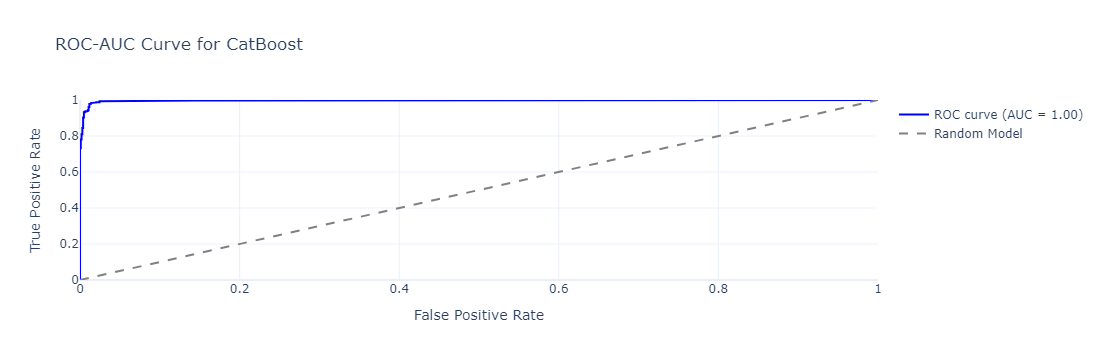

In [212]:
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go

cb_y_probs = cb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve & AUC score
fpr, tpr, _ = roc_curve(y_test, cb_y_probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# Add ROC curve
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (AUC = {roc_auc:.2f})', line=dict(color='blue')))

# Add diagonal reference line (random model)
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Model', line=dict(color='gray', dash='dash')))

# Customize layout
fig.update_layout(
    title="ROC-AUC Curve for CatBoost",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1]),
    template="plotly_white"
)

# Show plot
fig.show()